In [1]:
#K-Nearest Neighbors algorithm is the simplest of all the supervised machine learning algorithms.
#that classifies new cases based on the similarity measures (with regard to distance functions)
# It simply calculates the distance of a new data point to all other training data points. 
#The distance can be of any type e.g Euclidean or Manhattan etc. 
#It then selects the K-nearest data points, where K can be any integer.
#Finally it assigns the data point to the class to which the majority of the K data points belong.

#K-Nearest Neighbors computes the likelihood of each data point defaulting or not defaulting on a loan
# For example costumer 1 the probability of not defaulting is 100%. For costumer 2 the likelihood of not defaulting is 97%, for costumer 3 it is 73%. For costumer 4 the likelihood of defaulting(Y) is 53% which means that customer or people like that are likey going to default.

In [70]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [71]:
# load NN_dataset
filepath = "C:/Users/bvkka/Desktop/FinalProject/Area51Financial/NN_dataset.csv"
Data = pd.read_csv(filepath)
Data.columns

Index(['Customer_ID', 'Num_CC', 'Dependents', 'Status_Checking_Acc',
       'Credit_History', 'Purposre_Credit_Taken', 'Savings_Acc',
       'Years_At_Present_Employment', 'Marital_Status_Gender',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans ', 'Housing', 'Job',
       'Telephone', 'Foreign_Worker', 'Duration_binned',
       'Credit_amount_binned', 'Age_binned', 'Default_On_Payment'],
      dtype='object')

In [72]:
# set Customer_ID as index
Data.set_index('Customer_ID',inplace=True)

In [73]:
Data.dtypes

Num_CC                          int64
Dependents                      int64
Status_Checking_Acc            object
Credit_History                 object
Purposre_Credit_Taken          object
Savings_Acc                    object
Years_At_Present_Employment    object
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Other_Inst_Plans               object
Housing                        object
Job                            object
Telephone                      object
Foreign_Worker                 object
Duration_binned                object
Credit_amount_binned           object
Age_binned                     object
Default_On_Payment              int64
dtype: object

In [74]:
#Encoding data columns
#Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.
#In order to encode this data, you could map each value to a number
#This process is known as label encoding, and sklearn conveniently will do this for you using Label Encoder.


from sklearn.preprocessing import LabelEncoder

#creating labelEncoder
label_encoder = LabelEncoder()
# Converting string labels into numbers.
label_encoder.fit(Data['Dependents'])
Data['Dependents'] = label_encoder.transform(Data['Dependents'])

label_encoder.fit(Data['Status_Checking_Acc'])
Data['Status_Checking_Acc'] = label_encoder.transform(Data['Status_Checking_Acc'])

label_encoder.fit(Data['Credit_History'])
Data['Credit_History'] = label_encoder.transform(Data['Credit_History'])

label_encoder.fit(Data['Purposre_Credit_Taken'])
Data['Purposre_Credit_Taken'] = label_encoder.transform(Data['Purposre_Credit_Taken'])

label_encoder.fit(Data['Savings_Acc'])
Data['Savings_Acc'] = label_encoder.transform(Data['Savings_Acc'])

label_encoder.fit(Data['Years_At_Present_Employment'])
Data['Years_At_Present_Employment'] = label_encoder.transform(Data['Years_At_Present_Employment'])

label_encoder.fit(Data['Marital_Status_Gender'])
Data['Marital_Status_Gender'] = label_encoder.transform(Data['Marital_Status_Gender'])

label_encoder.fit(Data['Other_Debtors_Guarantors'])
Data['Other_Debtors_Guarantors'] = label_encoder.transform(Data['Other_Debtors_Guarantors'])

label_encoder.fit(Data['Other_Inst_Plans '])
Data['Other_Inst_Plans '] = label_encoder.transform(Data['Other_Inst_Plans '])

label_encoder.fit(Data['Housing'])
Data['Housing'] = label_encoder.transform(Data['Housing'])

label_encoder.fit(Data['Job'])
Data['Job'] = label_encoder.transform(Data['Job'])

label_encoder.fit(Data['Telephone'])
Data['Telephone'] = label_encoder.transform(Data['Telephone'])

label_encoder.fit(Data['Foreign_Worker'])
Data['Foreign_Worker'] = label_encoder.transform(Data['Foreign_Worker'])

label_encoder.fit(Data['Duration_binned'])
Data['Duration_binned'] = label_encoder.transform(Data['Duration_binned'])

label_encoder.fit(Data['Credit_amount_binned'])
Data['Credit_amount_binned'] = label_encoder.transform(Data['Credit_amount_binned'])

label_encoder.fit(Data['Age_binned'])
Data['Age_binned'] = label_encoder.transform(Data['Age_binned'])

In [75]:
Data.dtypes

Num_CC                         int64
Dependents                     int64
Status_Checking_Acc            int64
Credit_History                 int64
Purposre_Credit_Taken          int64
Savings_Acc                    int64
Years_At_Present_Employment    int64
Marital_Status_Gender          int64
Other_Debtors_Guarantors       int64
Other_Inst_Plans               int64
Housing                        int64
Job                            int64
Telephone                      int64
Foreign_Worker                 int64
Duration_binned                int64
Credit_amount_binned           int64
Age_binned                     int64
Default_On_Payment             int64
dtype: object

In [76]:
Data.head(5)

,Num_CC,Dependents,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned,Default_On_Payment
Customer_ID,,,,,,,,,,,,,,,,,,
100001,2,0,0,4,4,4,4,2,0,2,1,2,1,0,0,0,5,0
100002,1,0,1,2,4,0,2,1,0,2,1,2,0,0,4,2,0,0
100003,1,1,3,4,7,0,3,2,0,2,1,1,0,0,1,0,3,0
100004,1,1,0,2,3,0,3,2,2,2,2,2,0,0,3,3,3,0
100005,2,1,0,3,0,0,2,2,0,2,2,2,0,0,2,1,3,1


In [77]:
Data_new= Data.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])
Data_new.columns

Index(['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'],
      dtype='object')

In [78]:
X = Data_new.iloc[:,:-1]
X.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,4,4,0,1,1,0,0,0,5
100002,4,2,0,1,0,0,4,2,0
100003,7,3,0,1,0,0,1,0,3
100004,3,3,2,2,0,0,3,3,3
100005,0,2,0,2,0,0,2,1,3


In [79]:
y = Data_new.iloc[:,-1]
y.head()

Customer_ID
100001    0
100002    0
100003    0
100004    0
100005    1
Name: Default_On_Payment, dtype: int64

In [80]:
#To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
#to split our dataset into its attributes and labels
#To avoid over-fitting, we will divide our dataset into training and test splits
X = Data_new.iloc[:,:-1]
y = Data_new.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)


In [81]:
print('Train:'+repr(len(X_train)))
print('Test:'+repr(len(X_test)))

Train:4000
Test:1000


In [82]:
features = ['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'
       ]


X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
Data_new = Data_new[features]
print(X_train.shape)
print(Data_new.shape)

(4000, 9)
(5000, 10)


In [83]:
######ROC Curve plot function
#This is a callable ROC curve plot function. We have used this function to plot ROC Curve for models. We have used Seaborn package.
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [84]:
###Confusion Matrix Function
##to visualize True positives, True Negatives, False Positives and False Negatives for model
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["No Default", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [85]:
##KNN Model
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    #### Cross validation
    score_CV_train = cross_val_score(knn, X_train, y_train.ravel(), cv=10, scoring = 'f1')   #Flattened array->ravel function
    
    print ("mean accuracy of validation_train: ", score_CV_train.mean())
  
   
   
    






k: 1, Train/Test Score: 0.940/0.931
mean accuracy of validation_train:  0.8871091631437029
k: 3, Train/Test Score: 0.942/0.928
mean accuracy of validation_train:  0.8680156936387439
k: 5, Train/Test Score: 0.940/0.900
mean accuracy of validation_train:  0.7715645796102738
k: 7, Train/Test Score: 0.910/0.815
mean accuracy of validation_train:  0.6753494355817415
k: 9, Train/Test Score: 0.873/0.789
mean accuracy of validation_train:  0.6337037284095064
k: 11, Train/Test Score: 0.832/0.794
mean accuracy of validation_train:  0.623532027935433
k: 13, Train/Test Score: 0.820/0.776
mean accuracy of validation_train:  0.5887095833970455
k: 15, Train/Test Score: 0.815/0.766
mean accuracy of validation_train:  0.5431456892441283
k: 17, Train/Test Score: 0.804/0.758
mean accuracy of validation_train:  0.5194417995820808
k: 19, Train/Test Score: 0.797/0.760
mean accuracy of validation_train:  0.49845378518231376


![image.png](attachment:image.png)

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
y_pred
f1 = f1_score(y_test, y_pred)
print ('Test accuracy validation: ', f1)

k=1 Test Acc: 0.931
Test accuracy validation:  0.8808290155440415


In [87]:
y_prob = knn.predict_proba(X_test)[:,1]
y_prob



array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0.

In [90]:
#For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics.
#An additional measure of predictive power is the so-called Confusion Matrix. It has the form of the table below. 
#Here our model correctly predicted 676 cases as non-defualt(will pay) and 255 cases as default.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
KNN_Acc = f1_score(y_test,y_pred)
print("KNN accuracy_CV is ",KNN_Acc)

[[676  33]
 [ 36 255]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       709
          1       0.89      0.88      0.88       291

avg / total       0.93      0.93      0.93      1000

KNN accuracy_CV is  0.8808290155440415


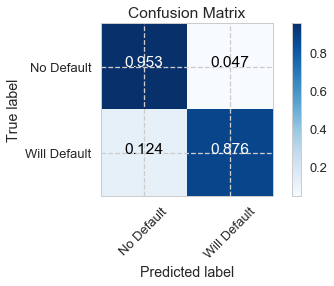

In [92]:
plot_confusion_matrix(y_pred, normalize=True)

plt.show()

###False Negative rate is the best metric to evaluate the model. Lower the number of false negatives, better the model is. 
#False negative is when model predicting "a borrower will pay the loan even though he will default". 

In [93]:
#One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.
#we will plot the mean error for the predicted values of test set for all the K values between 1 and 20
#let's first calculate the mean of error for all the predicted values where K ranges from 1 and 20
error = []

# Calculating error for K values between 1 and 20
#The above script executes a loop from 1 to 20. 
#In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.
for i in range(1, 20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

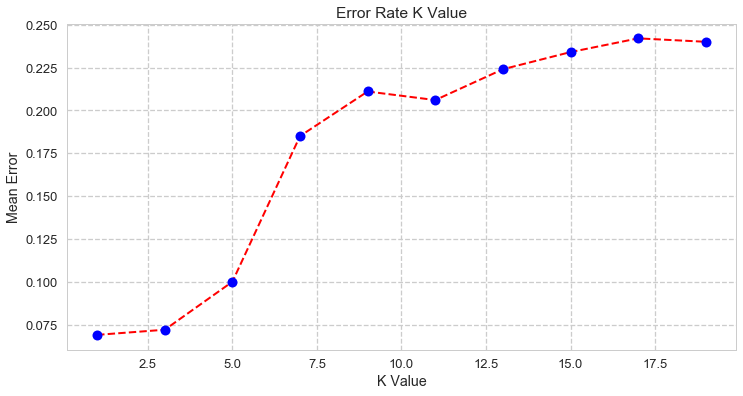

In [94]:
#to plot the error values against K values. Execute the following script to create the plot
import matplotlib.font_manager
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Best alpha using built-in LassoCV: 0.000109
Best score using built-in LassoCV: 0.074183
Lasso picked 9 variables and eliminated the other 0 variables


Text(0.5,1,'Feature importance using Lasso Model')

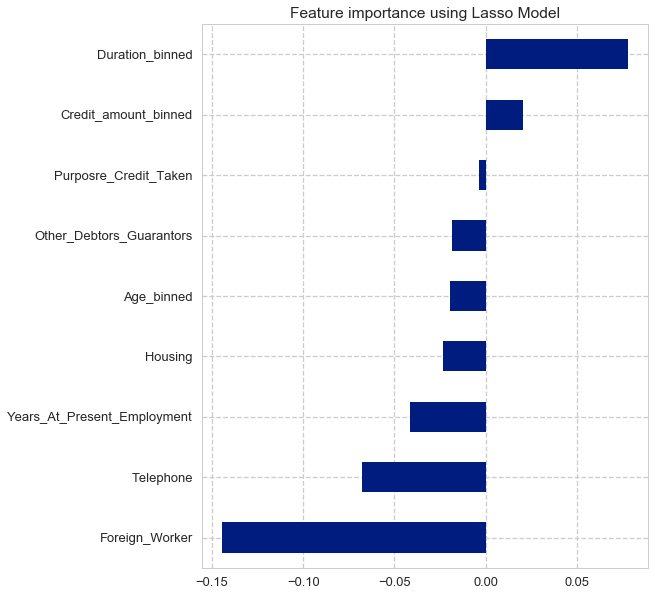

In [95]:
#Here we will do feature selection using Lasso regularization. 
#If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. 
#Hence the features with coefficient = 0 are removed and the rest are taken.
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset


reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [96]:
#ROC Chart
#The ROC chart is provides a means of comparison between classification models.
#Area under ROC curve (AUC)is often used as a measure of quality of the classification models.
#A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1. Here the AUC is 0.95

KNN accuracy is  0.8808290155440415


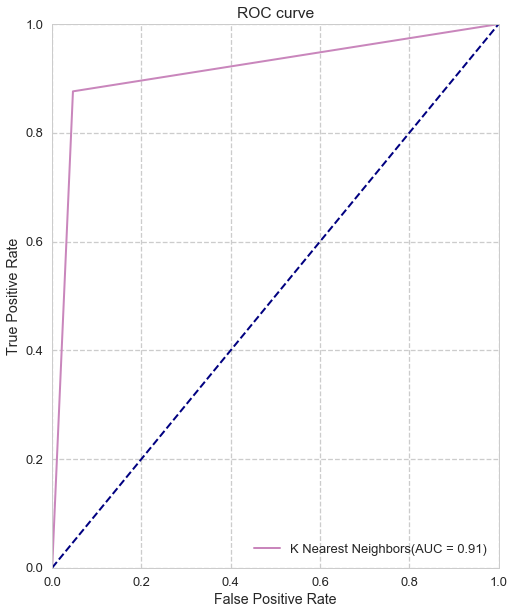

In [97]:
#KNN_Acc = accuracy_score(y_test,y_pred)
KNN_Acc = f1_score(y_test,y_pred)
print("KNN accuracy is ",KNN_Acc)  
plotAUC(y_test,y_prob,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
